In [153]:
import obspy
import numpy
import math
import cmath
from obspy import UTCDateTime, read, Trace, Stream
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib
%matplotlib inline
import scipy

from scipy import signal
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
import obspy

In [154]:
from obspy import read

stFL0 = read("./FallClean/Corrected/FAr_FL0_2019-10-12T21:44:29Z_HNY.mseed")
stFL = read("./FallClean/Corrected/FAr_FL_2019-10-12T21:44:29Z_HNY.mseed")
stFL60 = read("./FallClean/Corrected/FAr_FL60_2019-10-12T21:44:29Z_HNY.mseed")
stFL330 = read("./FallClean/Corrected/FAr_FL330_2019-10-12T21:44:29Z_HNY.mseed")
stFL660 = read("./FallClean/Corrected/FAr_FL660_2019-10-12T21:44:29Z_HNY.mseed")
stFL1K = read("./FallClean/Corrected/FAr_FL1K_2019-10-12T21:44:29Z_HNY.mseed")

start = st[0].stats['starttime']
print(start)
#sta = 'FL660'
comp = 'Y'
npts = st[0].stats['npts']

2019-10-12T21:44:19.001200Z


In [155]:
def gData(sta,comp,start,st): # st must be an obspy stream

    # create a new empty trace
    stg = Stream([Trace()])

    # conversion factor
    gravity = 4096
    
    # 
    data = st[0].data
    
    # make stream a list to apply conversion factor
    stList = data.tolist()
    #stList = st[0].data.tolist()
    gData = []

    for value in stList:
        gData.append(value/gravity)
    # obspy likes numpy arrays
    numpyList= np.asarray(gData, dtype=np.float32)
    
    # new obspy stream with amp values in g
    stg[0].data = numpyList


    # update the stats
    stg[0].stats['starttime'] = start
    stg[0].stats['delta'] = '0.005'
    stg[0].stats['sampling_rate'] = '200.0'
    stg[0].stats['network'] = 'XX'
    stg[0].stats['station'] = sta
    stg[0].stats['channel'] = comp
    stg[0].stats['location'] = 'zMAX'
    print(stg[0].stats)
    return stg

In [156]:
from datetime import datetime, timedelta
import pandas as pd

def mkTime(i,f,stg):#i = index to start with, f = index to end with, default with i=0 and f = npts
    # make some variables
    startSTZ = stg[0].stats['starttime']
    deltaSTZ = stg[0].stats['delta']
    nptSTZ = stg[0].stats['npts']
    
    # convert to a understandable string time format
    startSTZ = str(startSTZ)
    endSTZ = str(stg[0].stats['endtime'])
    startSTZ = datetime.strptime(startSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
    endSTZ = datetime.strptime(endSTZ, '%Y-%m-%dT%H:%M:%S.%fZ')
    
    # use the given start and stop times
    idxStart = i
    idxEnd = f
    timeStart = deltaSTZ * idxStart # START TIME IS FIRST INDEX
    #print('timeStart',timeStart)
    timeEnd = deltaSTZ * idxEnd # ENDTIME IS LAST INDEX

    # make into a time 
    st = pd.Timestamp(startSTZ+timedelta(seconds=timeStart)) # This was more complicated than it needs to be
    fin = pd.Timestamp(startSTZ+timedelta(seconds=timeEnd))

    # Put into equally spaced domain
    timeDomain = np.linspace(st.value,fin.value,nptSTZ)
    timeDomain = pd.to_datetime(timeDomain)
    
    # return the time Domain list
    print(len(timeDomain))
    return timeDomain

    


In [157]:
# convert to g
#stg = gData(sta,comp,start)
stFL0 = gData('FL0',comp,start,stFL0)
stFL = gData('FL',comp,start,stFL)
stFL60 = gData('FL60',comp,start,stFL60)
stFL330 = gData('FL330',comp,start,stFL330)
stFL660 = gData('FL660',comp,start,stFL660)
stFL1K = gData('FL1K',comp,start,stFL1K)


# make time domain
#i = 0
#f = npts
timeDomain = mkTime(i,f,stFL)

         network: XX
         station: FL0
        location: zMAX
         channel: Y
       starttime: 2019-10-12T21:44:19.001200Z
         endtime: 2019-10-12T21:45:19.001200Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         network: XX
         station: FL
        location: zMAX
         channel: Y
       starttime: 2019-10-12T21:44:19.001200Z
         endtime: 2019-10-12T21:45:19.001200Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         network: XX
         station: FL60
        location: zMAX
         channel: Y
       starttime: 2019-10-12T21:44:19.001200Z
         endtime: 2019-10-12T21:45:19.001200Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         network: XX
         station: FL330
        location: zMAX
         channel: Y
       starttime: 2019-10-12T21:44:19.001200Z
         endtime: 2019-10-12T21:45:19.001200Z
   s

In [158]:
def posStream(st, pos):
    data = st[0].data
    
    # make stream a list to apply conversion factor
    stList = data.tolist()
    #stList = st[0].data.tolist()
    newData = []

    for value in stList:
        newData.append(500*value + pos)
    # obspy likes numpy arrays
    numpyList= np.asarray(newData, dtype=np.float32)

    # new obspy stream with amp values in g
    st[0].data = numpyList
    return st[0].data

In [159]:
print(stFL660[0].data[10])
#print(stFL0[0].data[10])
for sta in ['FL0','FL','FL60','FL330','FL660','FL1K']:
    if sta == 'FL0':
        posStream(stFL0, -24)
    if sta == 'FL':
        posStream(stFL, 0)
    if sta == 'FL60':
        posStream(stFL60, 60)
    if sta == 'FL330':
        posStream(stFL330, 330)
    if sta == 'FL660':
        posStream(stFL660, 660)
    if sta == 'FL1K':
        posStream(stFL1K, 1000)
        
print(stFL660[0].data[10])

-0.00927734
655.361


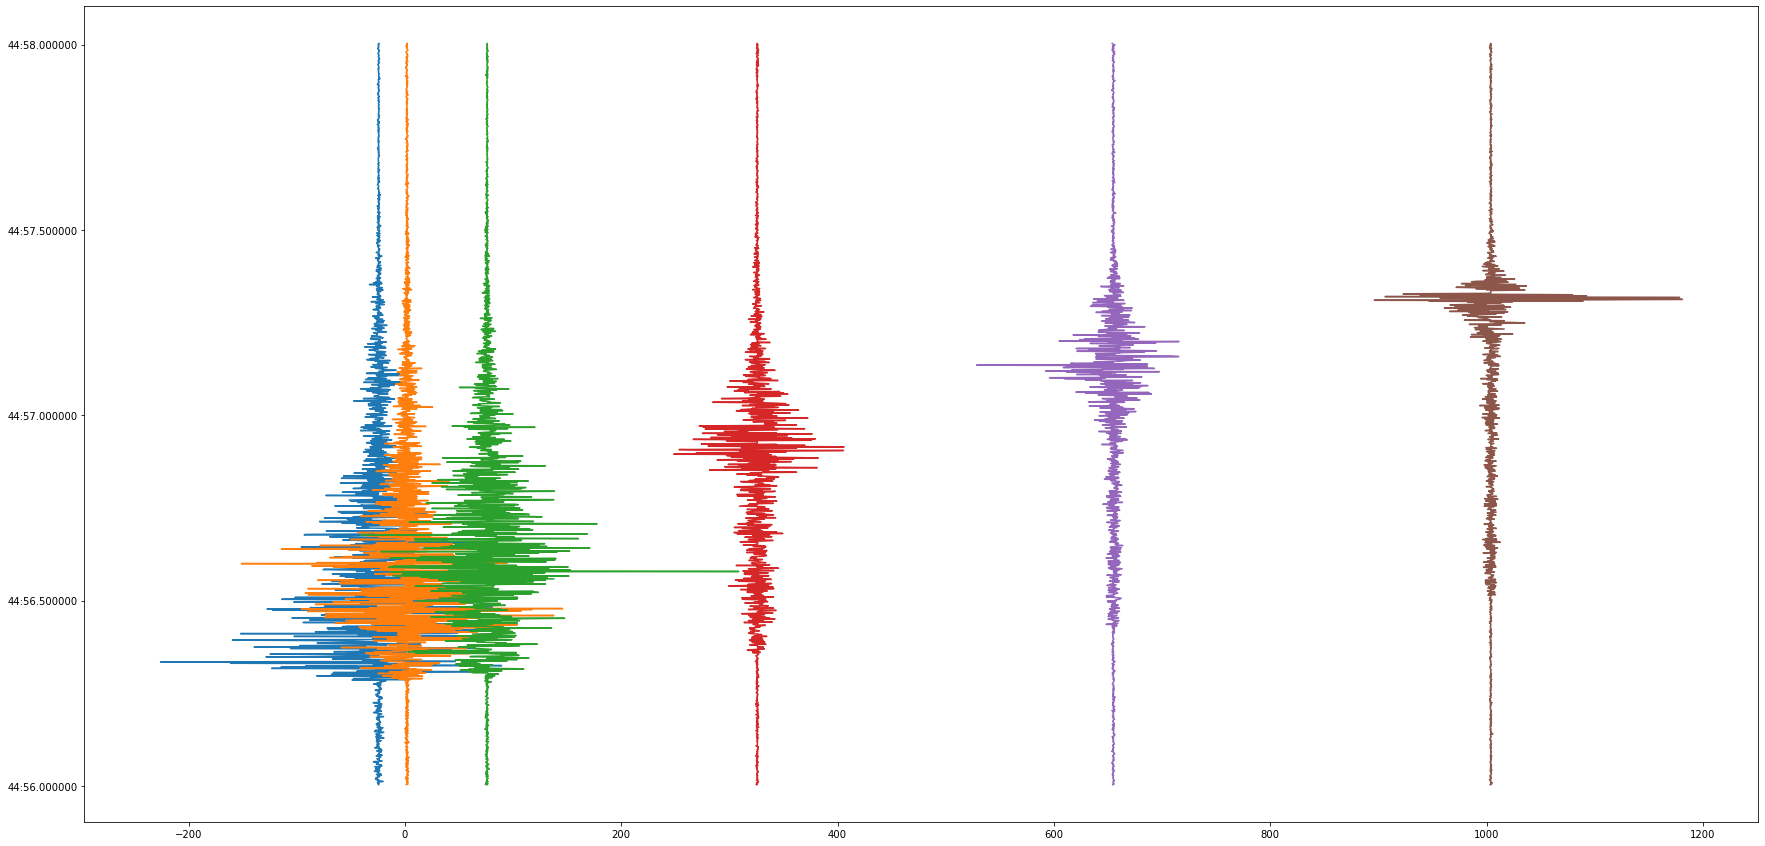

In [162]:
x1=5600
x2=7200

fig = plt.figure(figsize=(30, 15))
plt.plot(stFL0[0].data[x1:x2],timeDomain[x1:x2])
plt.plot(stFL[0].data[x1:x2],timeDomain[x1:x2])
plt.plot(stFL60[0].data[x1:x2],timeDomain[x1:x2])
plt.plot(stFL330[0].data[x1:x2],timeDomain[x1:x2])
plt.plot(stFL660[0].data[x1:x2],timeDomain[x1:x2])
plt.plot(stFL1K[0].data[x1:x2],timeDomain[x1:x2])
plt.show()
